In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CSV data
df1 = pd.read_csv('/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/cancer1.csv')
df2 = pd.read_csv('/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/cancer.csv')

In [30]:
df1

,fullPath,patient_id,image_id,Age,Density,cancer
0,Cancer\0001\C_0001_1.LEFT_CC.png,C_0001_1,LEFT_CC,65.0,2,1
1,Cancer\0001\C_0001_1.LEFT_MLO.png,C_0001_1,LEFT_MLO,65.0,2,1
2,Cancer\0001\C_0001_1.RIGHT_CC.png,C_0001_1,RIGHT_CC,65.0,2,1
3,Cancer\0001\C_0001_1.RIGHT_MLO.png,C_0001_1,RIGHT_MLO,65.0,2,1
4,Cancer\0002\C_0002_1.LEFT_CC.png,C_0002_1,LEFT_CC,72.0,2,1
...,...,...,...,...,...,...
2711,Cancer\4193\D_4193_1.RIGHT_MLO.png,D_4193_1,RIGHT_MLO,64.0,3,1
2712,Cancer\4199\D_4199_1.LEFT_CC.png,D_4199_1,LEFT_CC,65.0,3,1
2713,Cancer\4199\D_4199_1.LEFT_MLO.png,D_4199_1,LEFT_MLO,65.0,3,1
2714,Cancer\4199\D_4199_1.RIGHT_CC.png,D_4199_1,RIGHT_CC,65.0,3,1


In [31]:
df2

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [32]:
# Concatenate df2 to df1
metadata = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_file_path = '/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/metadata.csv'
metadata.to_csv(combined_file_path, index=False)

print("CSV files have been combined and saved to:", combined_file_path)


CSV files have been combined and saved to: /Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/metadata.csv


In [33]:
# Load the CSV data
metadata = pd.read_csv('/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/metadata.csv')

# Basic CSV EDA
print(metadata.head())
print(metadata.describe())
print(metadata.isnull().sum())

                             fullPath patient_id   image_id   Age  Density  \
0    Cancer\0001\C_0001_1.LEFT_CC.png   C_0001_1    LEFT_CC  65.0      2.0   
1   Cancer\0001\C_0001_1.LEFT_MLO.png   C_0001_1   LEFT_MLO  65.0      2.0   
2   Cancer\0001\C_0001_1.RIGHT_CC.png   C_0001_1   RIGHT_CC  65.0      2.0   
3  Cancer\0001\C_0001_1.RIGHT_MLO.png   C_0001_1  RIGHT_MLO  65.0      2.0   
4    Cancer\0002\C_0002_1.LEFT_CC.png   C_0002_1    LEFT_CC  72.0      2.0   

   cancer  site_id laterality view  age  biopsy  invasive  BIRADS  implant  \
0       1      NaN        NaN  NaN  NaN     NaN       NaN     NaN      NaN   
1       1      NaN        NaN  NaN  NaN     NaN       NaN     NaN      NaN   
2       1      NaN        NaN  NaN  NaN     NaN       NaN     NaN      NaN   
3       1      NaN        NaN  NaN  NaN     NaN       NaN     NaN      NaN   
4       1      NaN        NaN  NaN  NaN     NaN       NaN     NaN      NaN   

  density  machine_id difficult_negative_case  
0     NaN     

/var/folders/2y/zb895_4x1dxc318gjt97t7wr0000gn/T/ipykernel_1464/936998865.py:2: DtypeWarning: Columns (0,1,2,16) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/metadata.csv')


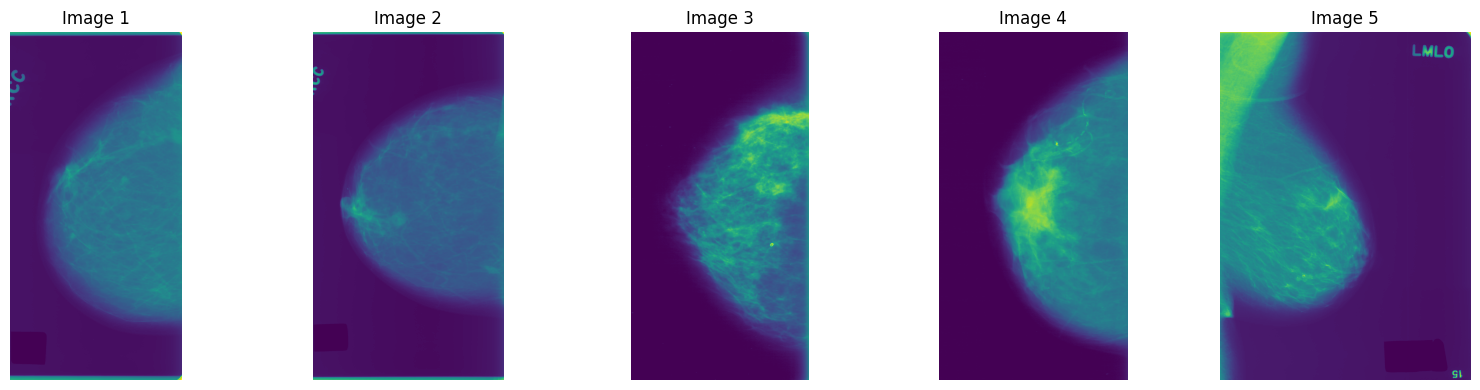

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# List of filenames
file_list = os.listdir('/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/cancer_new')

# Set up the figure size and layout
plt.figure(figsize=(16, 4))  # Adjust the size as needed

# Loop through the first N files in the file_list and display them
for i, filename in enumerate(file_list[:5]):  # Here, we're showing the first 5 images
    # Full path to the image file
    filepath = os.path.join('/Users/sanyamsinghchauhan/Desktop/Prescriptive/cancer/cancer_new', filename)
    
    # Read the image file
    image = mpimg.imread(filepath)
    
    # Add a subplot for each image
    plt.subplot(1, 5, i + 1)  # Adjust the layout parameters as needed (rows, columns, index)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')  # Turn off axis numbers and ticks

# Show all the images
plt.tight_layout()
plt.show()

In [35]:
def create_image_path(row, base_path='/Users/sanyamsinghchauhan/Downloads/bc_1280_train_lut'):
    image_id = str(int(row['image_id']))
    patient_id = str(int(row['patient_id']))
    return f"{base_path}/{patient_id}_{image_id}.png"

In [36]:
cancer_counts=metadata.groupby('cancer').size()
# Print the result
print(cancer_counts)

cancer
0    53548
1     3874
dtype: int64


In [37]:
metadata['patient_id'] = metadata['patient_id'].astype(str)

# Group by 'patient_id' and filter out those groups which don't have exactly four images
valid_groups = metadata.groupby('patient_id').filter(lambda x: len(x) == 4)

# Now we create a dictionary that has patient IDs as keys and the list of image paths as values
patient_image_groups = valid_groups.groupby('patient_id')['image_id'].apply(list).to_dict()

# Display the patient IDs and their corresponding image paths for the first two patients
for patient_id in list(patient_image_groups)[:2]:
    print(f"Patient ID: {patient_id}")
    print(f"Image Paths: {patient_image_groups[patient_id]}\n")

# Now we create a dictionary that has patient IDs as keys and the unique label as values
patient_cancer_groups = valid_groups.groupby('patient_id')['cancer'].first().to_dict()

Patient ID: 10006
Image Paths: ['462822612', '1459541791', '1864590858', '1874946579']

Patient ID: 10011
Image Paths: ['220375232', '270344397', '541722628', '1031443799']



In [38]:
for patient_id in list(patient_cancer_groups)[:2]:
    print(f"Patient ID: {patient_id}")
    print(f"Label: {patient_cancer_groups[patient_id]}\n")

# Initialize a counter dictionary
count = {0: 0, 1: 0}

# Iterate over each patient's cancer group and increment the counter
for group in patient_cancer_groups.values():
    count[group] += 1

# Display the count of 0s and 1s
count


Patient ID: 10006
Label: 0

Patient ID: 10011
Label: 0



{0: 8082, 1: 830}

In [39]:
dataset = []

for patient_id, images in patient_image_groups.items():
    label = patient_cancer_groups.get(patient_id, None)  # Get the label for the current patient_id
    if label is not None:  # Check if label exists
        entry = {'patient_id': patient_id, 'images': images, 'label': label}
        dataset.append(entry)

In [40]:
# First, we need to separate the records with label 0 and label 1
label_0_group = [record for record in dataset if record['label'] == 0]
label_1_group = [record for record in dataset if record['label'] == 1]

# Assuming label 1 group has the minimum count, we fix the number of 0's to match the number of 1's
fixed_label_0_group = label_0_group[:len(label_1_group)]

# Combine the fixed number of 0's with all the 1's to create a balanced dataset
balanced_dataset = fixed_label_0_group + label_1_group

In [41]:
number_of_samples = 1500

# Check if there are enough samples in label 0 group, if not use all available
if len(label_0_group) >= number_of_samples:
    selected_label_0_samples = label_0_group[:number_of_samples]
else:
    selected_label_0_samples = label_0_group

# Combine the selected samples from label 0 with all samples from label 1
balanced_dataset_2 = selected_label_0_samples + label_1_group

In [42]:
balanced_dataset_2[1]

{'patient_id': '10011',
 'images': ['220375232', '270344397', '541722628', '1031443799'],
 'label': 0}

In [43]:
# Assuming patient_image_groups is your dictionary
number_of_patients = len(patient_image_groups)
print("Number of patients with exactly four images:", number_of_patients)

Number of patients with exactly four images: 8912


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, Flatten, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.metrics import AUC
import numpy as np
import random
import datetime
import os
import tensorflow as tf
import shutil
from keras.metrics import Precision, Recall  # Importing Precision and Recall

In [45]:
# Define an ImageDataGenerator with augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate the images by up to 20 degrees
    width_shift_range=0.2,   # Shift the image width by a maximum of 20%
    height_shift_range=0.2,  # Shift the image height by a maximum of 20%
    shear_range=0.15,        # Shear the image by up to 15%
    zoom_range=0.2,          # Zoom in on the image by up to 20%
    channel_shift_range=10,  # Change the color channels by up to a value of 10
    horizontal_flip=True,    # Allow horizontal flipping of the image
    fill_mode='nearest',     # Use the nearest fill mode for new pixels
    preprocessing_function=preprocess_input  # Apply EfficientNet preprocessing
)

# For validation data, no augmentation is applied, just rescaling and preprocessing
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [46]:
# Function to split dataset into training and validation sets
def split_dataset(dataset, train_size=0.8):
    """Splits the dataset into training and validation sets.
    
    Args:
        dataset (list): The complete dataset list of dictionaries.
        train_size (float): The proportion of the dataset to include in the train split.
    
    Returns:
        tuple: Two lists, (training_dataset, validation_dataset).
    """
    # Shuffle dataset to ensure random distribution
    np.random.shuffle(dataset)
    
    # Calculate the number of samples in the training set
    train_end = int(len(dataset) * train_size)
    
    # Split the dataset
    training_dataset = dataset[:train_end]
    validation_dataset = dataset[train_end:]
    
    return training_dataset, validation_dataset

# Split your dataset
training_data, validation_data = split_dataset(balanced_dataset)

In [47]:

def generate_data(dataset, datagen, batch_size=10, augment=False):
    while True:
        for start in range(0, len(dataset), batch_size):
            end = min(start + batch_size, len(dataset))
            batch_data = dataset[start:end]
            
            # Initialize lists for images and labels
            batch_images = [[] for _ in range(4)]  # Create a list of lists for each input
            batch_labels = []
            
            for entry in batch_data:
                # Process images and add them to the corresponding list
                for i, img_path in enumerate(entry['images']):
                    img = load_img(img_path, target_size=(224, 224))
                    img = img_to_array(img)
                    if augment:
                        img = datagen.random_transform(img)
                    img = preprocess_input(img)
                    batch_images[i].append(img)

                # Add the label
                batch_labels.append(entry['label'])
            
            # Convert lists of images and labels to tensors
            batch_images = [np.stack(images) for images in batch_images]  # Stack images for each input
            batch_labels = np.array(batch_labels)

            # Convert to tensors
            batch_images = [tf.convert_to_tensor(images, dtype=tf.float32) for images in batch_images]
            batch_labels = tf.convert_to_tensor(batch_labels, dtype=tf.float32)
            
            # Yield the batch in the correct structure
            yield tuple(batch_images), batch_labels     

In [48]:
training_data_2, validation_data_2 = split_dataset(balanced_dataset_2)

In [49]:
# Create a `tf.data.Dataset` from the generator
train_dataset_2 = tf.data.Dataset.from_generator(
    lambda: generate_data(training_data_2, train_datagen, batch_size=10, augment=True),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
)

# Do the same for the validation dataset
val_dataset_2 = tf.data.Dataset.from_generator(
    lambda: generate_data(validation_data_2, validation_datagen, batch_size=10, augment=False),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
)

In [50]:
# Define a custom F1 Score metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary values (0 or 1)
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    
    return f1_val

In [51]:
# Build the model with EfficientNetB0
input_shape = (224, 224, 3)
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in efficientnet_base.layers:
    layer.trainable = False

def create_model():
    inputs = [Input(shape=input_shape) for _ in range(4)]

    # Pass each input through the EfficientNet base model
    outputs = [efficientnet_base(input_tensor) for input_tensor in inputs]

    # Flatten the outputs
    outputs = [Flatten()(output) for output in outputs]

    # Concatenate the outputs
    concatenated = concatenate(outputs)

    # Add a fully connected layer
    x = Dense(256, activation='relu')(concatenated)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    # Add the output layer
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=output)

    return model

model = create_model()

In [52]:
# Print the summary of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ input_layer_1[0]… │
│ (Functional)        │ 1280)             │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_3[0]… │
│                     │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 62720)     │          0 │ efficientnetb0[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 62720)     │          0 │ efficientnetb0[1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 62720)     │          0 │ efficientnetb0[2… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 62720)     │          0 │ efficientnetb0[3… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 250880)    │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │ 64,225,536 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 68,316,324 (260.61 MB)

 Trainable params: 64,266,753 (245.16 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'auc', f1_score, Precision(), Recall()])

In [54]:
# Setup TensorBoard callback
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model using the training and validation datasets
history = model.fit(
    train_dataset_2,
    validation_data=val_dataset_2,
    epochs=10,  # Set the number of epochs
    steps_per_epoch=len(training_data_2) // 10,
    validation_steps=len(validation_data_2) // 10,
    callbacks=[tensorboard_callback]
)



Epoch 1/10


AlreadyExistsError: Graph execution error:

Detected at node StatefulPartitionedCall/ArithmeticOptimizer/AddOpsRewrite_add_207/tmp_var defined at (most recent call last):
<stack traces unavailable>
Resource __per_step_0/StatefulPartitionedCall/ArithmeticOptimizer/AddOpsRewrite_add_207/tmp_var/frame:0/iter:0/N10tensorflow19TemporaryVariableOp6TmpVarE
	 [[{{node StatefulPartitionedCall/ArithmeticOptimizer/AddOpsRewrite_add_207/tmp_var}}]] [Op:__inference_one_step_on_iterator_105044]

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
import matplotlib.pyplot as plt

# Define the figure and subplots layout
plt.figure(figsize=(15, 10))

# Plot training & validation accuracy values
plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation F1 score values
plt.subplot(3, 2, 2)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(3, 2, 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation precision values
plt.subplot(3, 2, 4)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation recall values
plt.subplot(3, 2, 5)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
